In [13]:
import pandas as pd

url = 'https://raw.githubusercontent.com/aha85b/CS5590PDL/main/random/Cleaned-Data.csv'
dataset = pd.read_csv(url)
# Read info
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [14]:
# Print first 10 raws
print(dataset.sample(10))

        Fever  Tiredness  ...  Contact_Yes             Country
190021      0          0  ...            0               Spain
4093        0          0  ...            0               China
303477      0          0  ...            1               Other
45412       0          1  ...            0               Italy
308637      1          1  ...            1               Other
199691      0          1  ...            0             Germany
186562      0          1  ...            0               Spain
161828      0          0  ...            0               Spain
183555      0          0  ...            1               Spain
99136       0          0  ...            0  Republic of Korean

[10 rows x 27 columns]


In [15]:
# Print info like mean, max, etc
print(dataset.describe())

               Fever      Tiredness  ...     Contact_No    Contact_Yes
count  316800.000000  316800.000000  ...  316800.000000  316800.000000
mean        0.312500       0.500000  ...       0.333333       0.333333
std         0.463513       0.500001  ...       0.471405       0.471405
min         0.000000       0.000000  ...       0.000000       0.000000
25%         0.000000       0.000000  ...       0.000000       0.000000
50%         0.000000       0.500000  ...       0.000000       0.000000
75%         1.000000       1.000000  ...       1.000000       1.000000
max         1.000000       1.000000  ...       1.000000       1.000000

[8 rows x 26 columns]


In [16]:
# Check if there are null values
print(dataset.isnull().sum())

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64


In [17]:
# Show sum of all dataset according to countries
print(dataset.Country.value_counts().sum())

316800


In [18]:
# Show the freqency of countries
print(dataset.Country.value_counts())


France                31680
Germany               31680
China                 31680
Spain                 31680
Other-EUR             31680
Other                 31680
Italy                 31680
Republic of Korean    31680
UAE                   31680
Iran                  31680
Name: Country, dtype: int64


In [19]:
# Drop country column
drop_dataset = dataset.drop(['Country'], axis=1)
print(drop_dataset)

        Fever  Tiredness  Dry-Cough  ...  Contact_Dont-Know  Contact_No  Contact_Yes
0           1          1          1  ...                  0           0            1
1           1          1          1  ...                  0           1            0
2           1          1          1  ...                  1           0            0
3           1          1          1  ...                  0           0            1
4           1          1          1  ...                  0           1            0
...       ...        ...        ...  ...                ...         ...          ...
316795      0          0          0  ...                  0           1            0
316796      0          0          0  ...                  1           0            0
316797      0          0          0  ...                  0           0            1
316798      0          0          0  ...                  0           1            0
316799      0          0          0  ...                  1      

(316800, 2)
[2 2 2 ... 1 1 1]


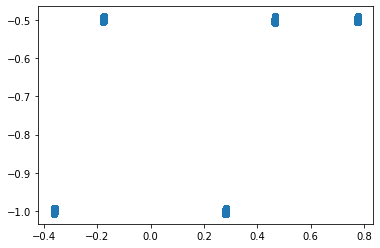

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

pca = PCA(2)

# Transform the data
df = pca.fit_transform(drop_dataset)

print(df.shape)

# Initialize the class object
kmeans = KMeans(n_clusters=3)

# predict the labels of clusters.
label = kmeans.fit_predict(df)

print(label)


# filter rows of original data
filtered_label0 = df[label == 0]

# plotting the results
plt.scatter(filtered_label0[:, 0], filtered_label0[:, -1])
plt.show()